# 🧪 Tek Örneklem T Testi: Küçük Veri ile Karar Almak

## Giriş: Büyük Veri Her Zaman Yok

Diyelim ki yeni bir ürün tasarladın.  
Bu ürünle ilgili 30 kişilik bir test grubun var.  
Ortalama memnuniyet skoru yüksek görünüyor ama yeterli mi?

> “Büyük veri her zaman elimizde olmaz.  
Küçük veriyle da karar vermek zorunda kalabilirsin.”  

## 🔍 Tek Örneklem T Testi Nedir?

Tek örneklem t-testi, bir örneklemin ortalamasının,  
bilinen veya varsayılan bir popülasyon ortalamasıyla  
istatistiksel olarak farklı olup olmadığını test eder.

📌 Genellikle:
- n < 30
- σ bilinmiyor
- Dağılım normal ya da yaklaşık normal

## 📐 Formülü:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

| Sembol | Açıklama |
|--------|----------|
| $\bar{x}$ | Örneklem ortalaması |
| $\mu_0$ | Popülasyon ortalaması (varsayımsal değer) |
| $s$ | Örneklem standart sapması |
| $n$ | Örneklem büyüklüğü |

📌 Serbestlik derecesi: `df = n - 1`

## 🧠 Neden Önemlidir?

| Sebep | Açıklama |
|--------|----------|
| ✅ **Küçük veri setleri için uygun** | n < 30 olsa bile test yapabilirsin |
| ✅ **Popülasyon standart sapması bilinmeyebilir** | O zaman t-testi tercih edilir |
| ✅ **Modelleme sürecinde kullanılır** | Özelliklerin anlamlılığını test etmede |
| ✅ **Karar verme aracıdır** | Fark gerçekten var mı? Yoksa tesadüf mü? |

📌 Özellikle klinik deneyler, küçük ölçekli anketler, ürün testleri gibi alanlarda hayati önem taşır.

## 🛠️ Adım Adım Uygulama: Gerçek Hayat Senaryosu

### Örnek:
Bir okulda öğrencilerin matematik notları inceleniyor.  
Okul genelinde ortalama not: **75**  
Senin sınıfındaki 25 öğrencinin ortalaması: **80**, std: **10**

#### Soru:
Senin sınıfının ortalaması, okul ortalamasından farklı mı?

### Adım 1: Hipotez Kurulumu

```python
print("H₀: Ortalama = 75")
print("H₁: Ortalama ≠ 75")
```

✅ Null hipotezi → fark yok  
Alternatif → fark var

Adım 2: Anlamlılık Düzeyini Belirle

In [1]:
alpha = 0.05
print(f"Anlamlılık düzeyi (α): {alpha}")

Anlamlılık düzeyi (α): 0.05


📌 %5 yanılma payı kabul ettik

In [5]:
#sample veri üret
import numpy as np

np.random.seed(42)
populasyon_ortalamasi = 75
orneklem_buyuklugu = 25
orneklem = np.random.normal(loc=80, scale=10, size=orneklem_buyuklugu)
print(f"Örneklem Ortalaması: {orneklem.mean():.2f}, Standart Sapma: {orneklem.std():.2f}")

Örneklem Ortalaması: 78.36, Standart Sapma: 9.37


Adım 4: T-Testi Yap

In [6]:
from scipy.stats import ttest_1samp

t_skoru, p_degeri = ttest_1samp(orneklem, popmean=populasyon_ortalamasi)
print(f"T Skoru: {t_skoru:.2f}, p-değeri: {p_degeri:.4f}")

T Skoru: 1.76, p-değeri: 0.0913


Adım 5: Karar Ver

In [7]:
if p_degeri < alpha:
    print("✅ H₀ reddedildi → Sınıfınız okuldan farklı")
else:
    print("❌ H₀ reddedilemedi → Fark tesadüfi olabilir")

❌ H₀ reddedilemedi → Fark tesadüfi olabilir


## 📊 Python Kodu ile Görselleştirme

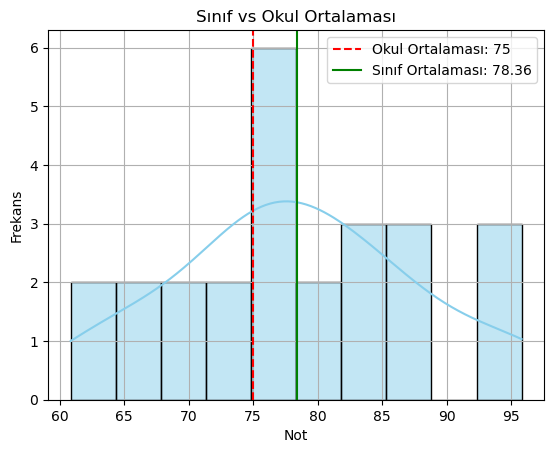

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(orneklem, bins=10, color='skyblue', edgecolor='black', kde=True)
plt.axvline(populasyon_ortalamasi, color='red', linestyle='--', label=f'Okul Ortalaması: {populasyon_ortalamasi}')
plt.axvline(orneklem.mean(), color='green', linestyle='-', label=f'Sınıf Ortalaması: {orneklem.mean():.2f}')
plt.title("Sınıf vs Okul Ortalaması")
plt.xlabel("Not")
plt.ylabel("Frekans")
plt.legend()
plt.grid(True)
plt.show()

📌 Bu grafikte kırmızı çizgi → okul ortalaması  
Yeşil çizgi → sınıf ortalaması

## 📈 T-Testi ve Z-Testi Arasındaki Fark

| Özellik | T-Testi | Z-Testi |
|---------|---------|----------|
| **Veri Sayısı** | n < 30 | n ≥ 30 |
| **σ Biliniyor mu?** | ❌ Hayır | ✅ Evet |
| **Dağılım** | T-dağılımı | Normal dağılım |
| **Uygulama Alanı** | Küçük veri, gerçek dünya testleri | Büyük veri, oran testleri |

📌 Küçük veride → t-testi  
Büyük veride → z-testi

## 📉 T-Testi Varsayımları ve Kontroller

### a) **Normallik Kontrolü**

In [10]:

from scipy.stats import shapiro

stat, p = shapiro(orneklem)
print(f"Shapiro-Wilk testi: p-değeri = {p:.4f}")

if p > 0.05:
    print("✅ Normallik sağlanıyor")
else:
    print("❌ Normallik sağlanmıyor")

Shapiro-Wilk testi: p-değeri = 0.6353
✅ Normallik sağlanıyor


📌 Eğer normallik sağlanmıyorsa, nonparametrik test kullanılmalı

## 📋 Gerçek Hayatta Kullanım Alanları

| Alan | Açıklama |
|------|----------|
| **Eğitim** | Bir sınıfın genel başarıya göre farkı |
| **Sağlık** | İlacın etkisi ölçüldüğünde kontrol testi |
| **Ürün Analizi** | Kullanıcı test sonuçları |
| **Finans** | Küçük yatırım portföylerinde getiri karşılaştırması |

📌 T-testi, model kurulumlarında değişken seçimi için de kullanılır.

## 📐 T-Testi ile Regresyon Bağlantısı

Regresyon analizinde her katsayı bir t-testine tabidir.

📌 Modeldeki her X değişkeni için:
- H₀: β = 0 → değişkenin etkisi yok
- H₁: β ≠ 0 → değişkenin etkisi var

📌 Bu yüzden t-testi, makine öğrenmesinde de temeldir.

## **Örnek:**

Bir araştırmacı, bir şehrin ortalama IQ puanının 100 olduğunu iddia etmektedir. Rastgele seçilen 25 kişiden oluşan bir örneklemde ortalama IQ puanı 105 ve standart sapma 15 olarak bulunmuştur. Bu iddiayı test etmek için Tek Örneklem T Testi kullanalım (α = 0.05):

1. **Hipotezler:**
    
    - H₀: μ = 100
    - H₁: μ ≠ 100
2. **T İstatistiği:**
    
    ```
    t = (105 - 100) / (15 / √25) = 5 / 3 = 1.67
    ```
    
3. **Serbestlik Derecesi:**
    
    sd = 25 - 1 = 24
    
4. **Kritik T Değeri:**
    
    α = 0.05 ve sd = 24 için iki yönlü t tablosundan kritik t değeri yaklaşık olarak ±2.064 olarak bulunur.
    
5. **Karar:**
    
    Hesaplanan t istatistiğinin mutlak değeri (1.67), kritik t değerinden (2.064) küçüktür. Bu nedenle, sıfır hipotezi reddedilmez. Bu, örneklemdeki ortalama IQ puanının 105 olmasının, şehrin genel ortalama IQ puanının 100 olduğu iddiasını çürütmek için yeterli kanıt sağlamadığı anlamına gelir.

##  İş Uygulaması: Ürün Satın Alma Optimizasyonu 

Problem:

Sepete ürün ekleme işlemi sonrasında ödeme ekranında 5 adım vardır ve bu adımların birisi sorgulanmaktadır.

Sepete ürün ekleme, fatura ve adres bilgisini girme, vb. bilgilerin girildiği 5 adımlık bir süreç var.

Detaylar:

Her adımın 20'şer saniye olması hedefi var. 4. adım sorgulanıyor. Bu durumu test etmek için 100 örnek alınıyor.  
Örnek standart sapması 5 saniyedir. Örnek ortalaması ise 19 saniyedir.


Ortaya çıkan bir etkinin şans eseri olup olmadığını, istatistiki olarak şansa yer bırakmayacak şekilde ispat etmeye çalışıyoruz.

19 saniyenin istatistiki olarak nalamlı olup olmadığını değerlendireceğiz.


**Adım 1 :**

Hipotezlerin kurulması ve yönlerinin belirlenmesi

H0 : μ = 20

H1 : μ != 20

H0: Bilinmeyen ana kütle parametresi μ yani kişilerin 4. adımda geçirdikleri süre ortalaması 20'dir.

H1 : Bilinmeyen ana kitle ortalaması μ yani kişilerin 4. adımda geçirdikleri süre ortalaması 20 saniyeden farklıdır.



**Adım 2 :** 

Anlamlılık düzeyinin ve tablo değerinin belirlenmesi


α = 0.05  α/2 = 0.025 -> hipotezimiz iki yanlı/yönlü olduğundan 2'ye bölüyoruz

Ztablo tablo olasılık değeri : 0.5 - 0.025 = 0.475  -> 0.5 ise 1 olasılık alanının dağılımının yarısı, mean ile z'nin arasında kalan bölüm, grafiğin üst tarafının toplamı 1 olacaktı , yarısını aldık

Ztablo kritik değer = -/+ 1.96


**Adım 3 :**  

Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması   n = 100, standart sapma = 5 , örnek ortalaması 19 sn

zhesap = (19-20)/(5/sqrt(100)) = -2.00

şimdi elde ettiğimiz zhesap değerle ztablo değerini karşılaştırıp karar vereceğiz.

**Adım 4 :**

Ztablo ve Zhesap karşılaştırması Zh > Zt ya da -Zh < -Zt ise H0 Red

Zhesap = -2.00 < Ztablo = -1.96 olduğu için **H0 reddedilir.**


Eğer hipotez red bölgelerine düşmeseydi, bu durumda H0 hipotezini red etmek için yeterli kanıt bulunamadı veya istatistiki olarak anlamlı bir sonuç elde edelememiştir yorumu yapılabilirdi.

**Adım 5 :**

Yorum

4.adımda geçirilen sürenin 20 sn olduğunu iddia eden H0 hipotezi reddedilmiştir Buna göre kullanıcılar istatiksel olarak %95 güvenilirlik ile 4. adımda 20 saniyeden farklı zaman geçirmektedir.


Eğer H0'ı reddedemeseydik bu durumda kullanıcılarımız web sitemizde 4.adımda yaklaşık 20 sn zaman geçirdiğini kabul edecektik. 

Kullanıcı deneyimini hipotez testleri üzerine oturtturursak buradan elde edilecek kararlar tamamen bilimsel olur. Yani insan faktörü, yanlılıklar ortadan kaldırılmış olacaktır.

Normallik varsayımını bu örnekte incelemedik. Elimizde örneğin normallik varsayımını sağlayığ sağlamadığı test edilmelidir. Bu sağlanmıyorsa non parametric t testi yapılmalıdır.

## İş Uygulaması : Web Sitesinde Geçirilen Sürenin Testi

Problem: 

Web Sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

Detay:

Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var.

Bu veriler incelendiğinde bir yönetici veya çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.



H0 : μ = 170

H1 : μ != 170

Tek Örneklem T Testi - Örnek ortalamasına ilişkin test yapmak için kullanılır.

In [11]:
import numpy as np

olcumler = np.array([17,160,234,149,145,107,197,75,201,225,211,119,157,145,127,244,163,114,145, 65,112,185,202,146,203,
                   224,203,114,188,156,187,154,177,95,165,50,110,216,138,151,166,135,155,84,251,173,131,207,121,120]) #örneklem

In [12]:
olcumler[0:10] #örneklemdeki ilk 10 elemanı gösterelim

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [13]:
import scipy.stats as stats

In [14]:
stats.describe(olcumler) #örneklemdeki verilerin istatistiksel özetini alalım

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## <span style="color:red">**Varsayımlar**</span>
#### <span style="color:red">**Normallik varsayımı kontrolü**</span>

Tek Örneklem T Testi Varsayım Kontrolü

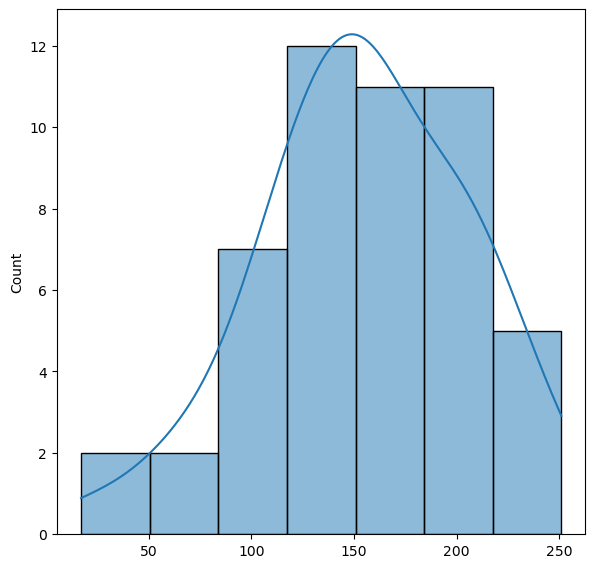

In [15]:
#histogram veya qqplot ile normal dağılım kontrolü yapılabilir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.histplot(olcumler,kde=True) ;      #Burada görece normal bir dağılım var.

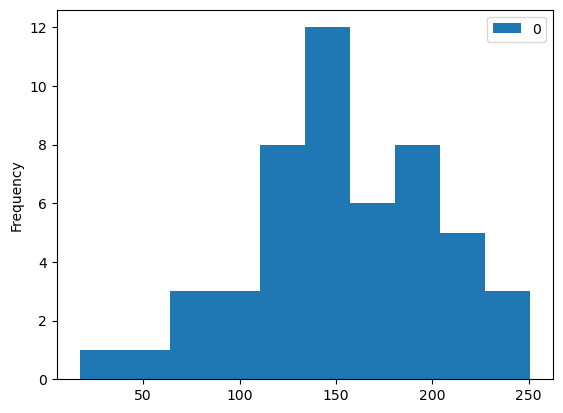

In [16]:
pd.DataFrame(olcumler).plot.hist(); #histogram, matplotlib kütüphanesi kullanılarak çizildi, ilk önce olcumler numpy array olarak tanımlandığı için pandas dataframe'e çevirildi

#dağılımın normal olduğu izlenimi verilmektedir.

## Probability plot, qqplot ile normal dağılım kontrolü yapılabilir

Grafik incelendiğinde, örneklem verilerinin normal dağılıma yakın olduğu görülmektedir. Normal dağılım ve Teorik Dağılımla karşılaştırma yapıldığında, örneklem verilerinin normal dağılıma yakın olduğu görülmekte, bir değerlendirme imkanı sağlamaktadır.


Örnek dağılım ile teorik dağılım arasında bir uyum olup olmadığını görmek için qqplot kullanılmaktadır. qqplot, örnek dağılım ile teorik dağılım arasındaki uyumu görmek için kullanılan bir grafik türüdür. Eğer örnek dağılım ile teorik dağılım arasında bir uyum varsa, noktaların çizgi üzerinde olması beklenir. Eğer örnek dağılım ile teorik dağılım arasında bir uyum yoksa, noktaların çizgi üzerinde olmaması beklenir. qqplot, örnek dağılım ile teorik dağılım arasındaki uyumu görmek için kullanılan bir grafik türüdür. Eğer örnek dağılım ile teorik dağılım arasında bir uyum varsa, noktaların çizgi üzerinde olması beklenir. Eğer örnek dağılım ile teorik dağılım arasında bir uyum yoksa, noktaların çizgi üzerinde olmaması beklenir.

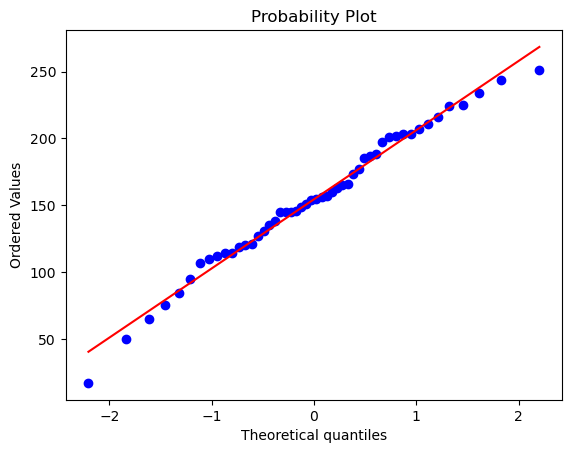

In [17]:
#Probability plot, qqplot ile normal dağılım kontrolü yapılabilir
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

#qqplot grafiğindeki noktaların çizgi üzerinde olması durumunda normal dağılım varsayımı sağlanmış olur

> #### <span style="color:red">**Shapiro-Wilks Testi**</span>

Hipotez testinin içerisinnde başka bir hipotez testi yapacağız.

Asıl amacımız, elimizdeki bir sayısal değişkenin ortalamasının blirli bir değere eşit olup olmadığını sınamak.


Elimizdeki ölçümler setinin dağılımının normal olup olmadığını test ediyoruz.

Hipotez testimiz:

- **H0:  Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak bir fark yoktur. Yani dağılım normaldir.**

- **H1: ... fark vardır. Dağılım normal değildir.**


In [18]:
from scipy.stats import shapiro

In [19]:
shapiro(olcumler) #shapiro-wilk testi uyguluyoruz, bu fonsiyonun içerisine testini yapmak istediğimiz numpy arrayimizi giriyoruz. sol taraftaki değer test istatistiğini, sağ taraftaki değer ise p-value değerini verir

#Çıkan sonucu göre H0 hipotezi reddedilemez. pvalue değeri 0.05'ten büyük olduğu için normal dağılım varsayımı sağlanmaktadır.
#Örnek dağılım ile teorik dağılım arasında istatiksel olarak anlamlı bir farklılık yoktur.

ShapiroResult(statistic=0.9853103897061022, pvalue=0.7848671719373956)

In [20]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853103897061022
Hesaplanan P-value: 0.7848671719373956


### Hipotez Testinin uygulanması

Az önce varsayım sağlanıyor mu onu kontrol ettik, sağlandığına göre artık hipotez testini uygulayabiliriz.

- **H0:Web sitemizde geçirilen ortalam süre 170'tir**
     
- **H1: ...değildir.**

- NOT:Parametrik test çeşitli varsayımlar sağlandığında uygulanabilir test demek.

In [21]:
stats.ttest_1samp(olcumler, popmean=170) #tek örneklem t testi uyguluyoruz, bu fonsiyonun içerisine testini yapmak istediğimiz numpy arrayimizi ve popülasyon ortalamasını giriyoruz. sol taraftaki değer test istatistiğini, sağ taraftaki değer ise p-value değerini verir

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

**p-value** ,  alfa değeri 0.05'ten küçük olduğu için H0 hipotezi reddedilir. Yani örneklem ortalaması ile popülasyon ortalaması arasında istatiksel olarak anlamlı bir farklılık vardır.

- **H0:Web sitemizde geçirilen ortalam süre 170'tir**
     
- **H1: ...değildir.**

Test sonuçları incelendiğinde P-value değeri alfa değeri 0.05 değerinden küçük olduğundan dolayı H0 hipotezimiz reddedilir. Web sitemizde ortalama geçirelen süre 170 sn değildir. Örnekten elde ettiğimiz ortalama 154 civarı da olduğundan dolayı web sitemizde ortalama geçirilen süre 170'den küçüktür.

## Nonparametrik Tek Örneklem Testi

Diyelim ki varsayım sağlanmıyor.

Tek örneklem testleri, bir örneklem ile popülasyon arasındaki bir parametrenin eşitliğini test etmek için kullanılır. Eğer veri normal dağılıma uymuyorsa veya örneklem büyüklüğü küçükse, nonparametrik yöntemler tercih edilebilir. Nonparametrik yöntemlerde tek örneklem testi için yaygın olarak kullanılan bir test, Wilcoxon işaret testidir.

### Wilcoxon İşaret Testi:

Wilcoxon işaret testi, bir örneklemle popülasyon ortalaması arasında bir fark olup olmadığını kontrol etmek için kullanılan nonparametrik bir testtir. Bu test, özellikle veri normal dağılıma uymadığında veya sıralı veri türlerinde etkilidir.

Wilcoxon işaret testinin hipotezleri şu şekildedir:

- **Null Hypothesis (H0):** Popülasyon medyanı, örneklem medyanıyla eşittir.
- **Alternative Hypothesis (H1):** Popülasyon medyanı, örneklem medyanından farklıdır.

Wilcoxon işaret testi, gözlemleri sıralayarak işlem yapar ve gözlemlerin işaretli sıralarının toplamını kullanarak test istatistiğini oluşturur.

In [22]:
#sign testi uygulamak için gerekli modülü import edelim
from statsmodels.stats.descriptivestats import sign_test 

In [23]:
sign_test(olcumler, 170) #sign testi uyguluyoruz, bu fonsiyonun içerisine testini yapmak istediğimiz numpy arrayimizi ve popülasyon ortalamasını giriyoruz. sol taraftaki değer test istatistiğini, sağ taraftaki değer ise p-value değerini verir

(-7.0, 0.06490864707227217)

In [24]:
stats.wilcoxon(olcumler,alternative='greater')[0]

1275.0

In [25]:
from scipy.stats import wilcoxon
#Burada p value > 0.05 zaten biz bunu biliyorduk.Bu testin sonucu yanıltıcı.Nedeni ise yukarı da varsayımlar sağlandığı için bu testi kullanamayız. 
#p değeri (testin anlamlılık düzeyi) kullanılarak elde edilen sonuçlar yorumlanır. 
#Eğer p değeri belirli bir anlamlılık düzeyinden küçükse (örneğin, 0.05), o zaman referans değer ile medyan arasında istatistiksel olarak anlamlı bir fark olduğu iddia edilebilir.
print(f'Test İstatistiği: {stats.wilcoxon(olcumler,alternative="greater")[0]}')  
print(f'P-value :{stats.wilcoxon(olcumler)[1]}')          
#`wilcoxon` fonksiyonu, test istatistiği ve p değerini döndürür. P değeri, null hipotezin reddedilip edilmeyeceğini belirler. Eğer p değeri belirli bir anlamlılık düzeyinden küçükse (genellikle 0.05), null hipotezi reddedilir ve popülasyon medyanı ile örneklem medyanı arasında anlamlı bir fark olduğu sonucuna varılır.      

Test İstatistiği: 1275.0
P-value :1.7763568394002505e-15


Bu kez merkezi eğilime yönelik bir testler yaptık. Merkezi eğilimin, median'ın 170 olup olmdığını test ediyoruz. Dağılım çarpık olduğunda ortlama kullanılamayacağı gibi parametrik test de kullanılmıyor. Non Parametrik bir hipoteztesti kurduğumuzda o testin kavramsal karşılığı yine de aynı olsa da ufak tefek farklılıklar ortaya çıkabilir.

P-Value > alfa 0.05 değerinden büyük. H0'ı reddemiyoruz diyoruz.

Bu testlerin sonucu yanıltıcı çıktı. 

p value > 0.05 zaten biz bunu biliyorduk.Bu testin sonucu yanıltıcı. Nedeni ise yukarıda yaptığımız parametrik örnekte varsayımlar sağlandığı için bu testleri kullanamayız. 
p değeri (testin anlamlılık düzeyi) kullanılarak elde edilen sonuçlar yorumlanır. 
Eğer p değeri belirli bir anlamlılık düzeyinden küçükse (örneğin, 0.05), o zaman referans değer ile medyan arasında istatistiksel olarak anlamlı bir fark olduğu iddia edilebilir.


Yalnız elimizdeki veri parametrikti. O yüzden yukardaki sonuçlarla ilgilenmiyoruz. 